In [ ]:
'''
스칼라 : 크기만 가지고 있는 어떤 물리량 = 속력
벡터 : 스칼라 값에 방향이 존재하는 물리량 = 속도

중요1)) 크기와 방향이 같으면 두 벡터는 같다. 
벡터의 시점과 종점이 달라도 평행이동으로
겹쳐질수 있다면 같은 벡터이다

중요2)) 행렬의 곱셈은 교환법칙이 성립하지 않는다.


내적이라는것을 활용하면 두벡터사이의 각도를 알 수 있다.

if and only if : 필요충분조건

determinant : 행렬식

고유값과 고유벡터

linear system은 superposition이다

superposition은 Homogeneity와 Additivitiy를 만족한다
'''

In [ ]:
'''
precision : 내가 예측한 것 중에서 맞은것에 대한 비율
내가 1이라고 예측한것중 1이 몇개였는지
-> 스팸메일 분류

recall : 1이었던 전체의 집단을 분모로 두고 내가 맞춘것을 분자로 놓은 것
전체 1중 내가 1이라고 예측해서 맞은것에 대한 비율
-> 병원의 진단결과

fallout : 전체 0 중에서 내가 1이라고 예측해서 틀린것
전체 0이 분모, 내가 1이라고 잘못 예측한것이 분자

accuracy : 전체 정답이 분모, 내가 1이라고 예측한것 + 0이라고 예측한것이 분자

F1-score : recall과 precision을 결합한 지표
recallrhk precision이 한쪽으로 치우치지 않고 둘다 높을때 
F1-score도 높은 값이 나온다.
'''

In [1]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'
red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste','quality'],axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=13)
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('train acc : ',accuracy_score(y_train, y_pred_tr))
print('test acc : ',accuracy_score(y_test, y_pred_test))

train acc :  0.7294593034442948
test acc :  0.7161538461538461


In [5]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print('accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('precision : ', precision_score(y_test, y_pred_test))
print('AUC score : ', roc_auc_score(y_test, y_pred_test))
print('F1 score : ', f1_score(y_test, y_pred_test))
# 각 평가 지표 출력

accuracy :  0.7161538461538461
Recall :  0.7314702308626975
precision :  0.8026666666666666
AUC score :  0.7105988470875331
F1 score :  0.7654164017800381


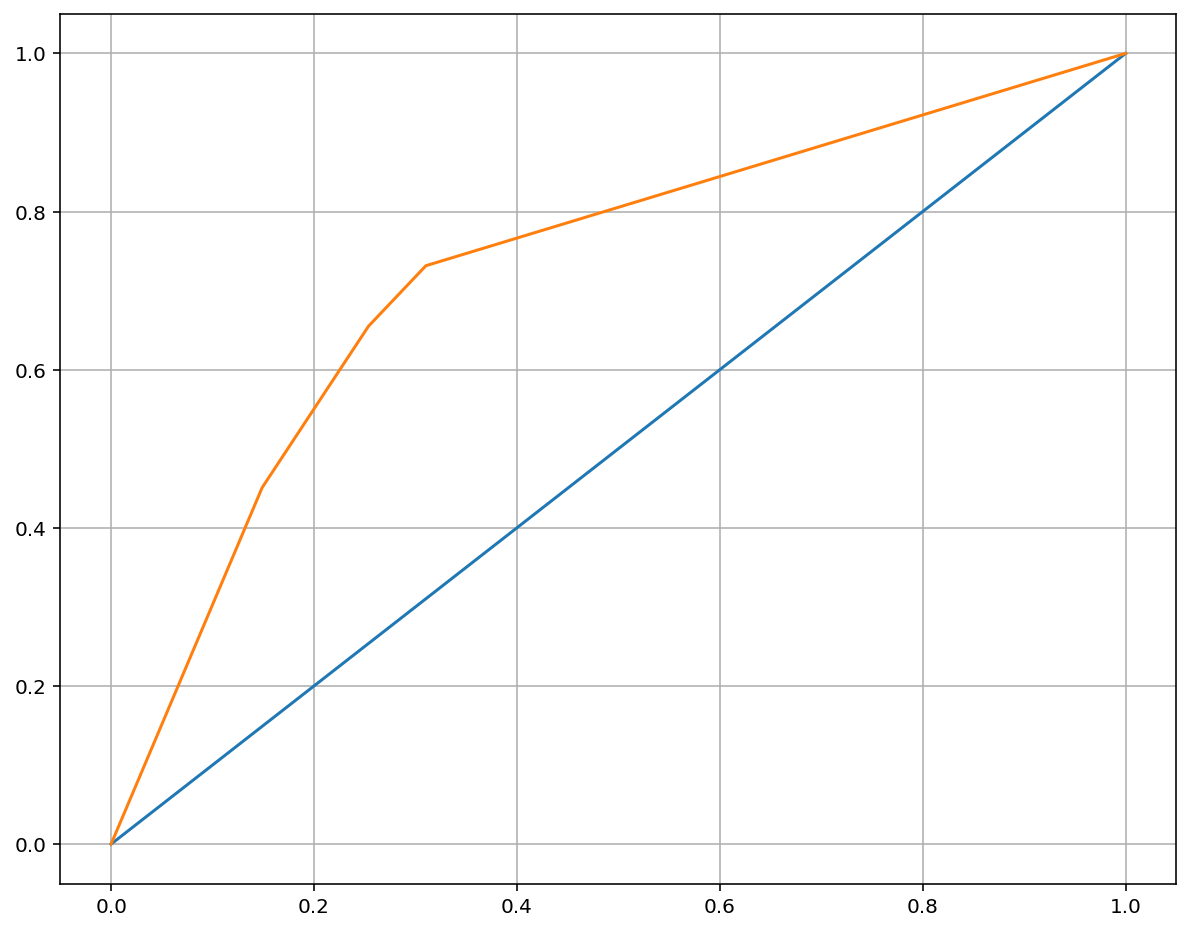

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:,1]
'''
predict_proba 라는 함수를 거치면 (0일 확률, 1일확률)과 같은 형태로
출력이 된다. 그래서 위의 코드는 그 중 1일 확률만을 선택해서
pred_proba로 선언한것
'''
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.grid()
plt.show()

In [9]:
pred_proba

array([0.38397406, 0.38397406, 0.87802198, ..., 0.87802198, 0.38397406,
       0.87802198])